# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress

from pprint import pprint

# Import API key. Renamed mine
from api_keys_Yvonne import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#Retrieve 5 cities
cities[0:5]

['norman wells', 'ushuaia', 'chuy', 'atuona', 'tumannyy']

In [4]:
# Using: 06-Python-APIs,Day 2, Activities04, Stu_BurundiWeatherAppSolved

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#using farenheit
units = "imperial"

In [5]:
 # Build query URL and request your results in Farenheit
city = "yellowknife"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
#good habit as 200 means it works 
print(weather_response.status_code)

weather_json = weather_response.json()

200


In [6]:
#see the data
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 62.456, 'lon': -114.3525},
 'dt': 1644133919,
 'id': 6185377,
 'main': {'feels_like': -30.48,
          'humidity': 69,
          'pressure': 1012,
          'temp': -17.88,
          'temp_max': -17.88,
          'temp_min': -17.88},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
         'id': 1007,
         'sunrise': 1644162697,
         'sunset': 1644191485,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 140, 'speed': 9.22}}


In [7]:
#use csv to get the columns we want
city_name = weather_json["name"]
cloudiness = weather_json["clouds"]["all"]
country = weather_json["sys"]["country"]
date_cty = weather_json["dt"]
humidity = weather_json["main"]['humidity']
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]
temp = weather_json["main"]['temp']
wind = weather_json["wind"]["speed"]
pressure = weather_json["main"]['pressure']

In [8]:
#test my outputs for different cities
humidity

69

In [9]:
#make my lists from above 
names = []
cloudys = []
countries = []
dates = []
humids = []
lats = []
lngs = []
temps = []
winds = []
pressures = []

#create loop to go through small count first  
for city in cities:
    
    #request
    print(city)
    
    # Build query URL and request your results in Farenheit
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    #good habit as 200 means it works 
    print(weather_response.status_code)
    #break up data with blank line
    print()
    
    #try catch
    try:
    
        #get data
        weather_json = weather_response.json()

        #use csv to get the columns we want
        city_name = weather_json["name"]
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date_cty = weather_json["dt"]
        humidity = weather_json["main"]['humidity']
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        temp = weather_json["main"]['temp']
        wind = weather_json["wind"]["speed"]
        pressure = weather_json["main"]['pressure']

        #now add them into lists
        names.append(city_name)
        cloudys.append(cloudiness)
        countries.append(country)
        dates.append(date_cty)
        humids.append(humidity)
        lats.append(lat)
        lngs.append(lng)
        temps.append(temp)
        winds.append(wind)
        pressures.append(pressure)
        
    except Exception as e:
        #where the error is
        print(e)
        
        # if there is no data for city replace with nan or none
        names.append(city)
        cloudys.append(np.nan)
        countries.append(None)
        dates.append(np.nan)
        humids.append(np.nan)
        lats.append(np.nan)
        lngs.append(np.nan)
        temps.append(np.nan)
        winds.append(np.nan)
        pressures.append(np.nan)
        
    time.sleep(1)

norman wells
200

ushuaia
200

chuy
200

atuona
200

tumannyy
404

'name'
busselton
200

hamilton
200

ukiah
200

shenjiamen
200

cilegon
200

bredasdorp
200

pedasi
200

ji-parana
404

'name'
jamestown
200

tuktoyaktuk
200

mattru
200

vila velha
200

dikson
200

hilo
200

santana do livramento
200

rikitea
200

taolanaro
404

'name'
hobart
200

zhigansk
200

ulladulla
200

kita
200

mount gambier
200

kodiak
200

kodinsk
200

mataura
200

fortuna
200

wellington
200

kaitangata
200

quesnel
200

arraial do cabo
200

kidal
200

vostok
200

ancud
200

baykit
200

tasiilaq
200

hithadhoo
200

axim
200

cape town
200

saint-francois
200

mushie
200

malanje
200

okhotsk
200

lompoc
200

shwebo
200

oistins
200

new glasgow
200

pevek
200

katobu
200

bethel
200

ewa beach
200

avarua
200

ashland
200

gat
200

kargasok
200

mount isa
200

barrow
200

qaqortoq
200

quelimane
200

necochea
200

prescott
200

mar del plata
200

cidreira
200

alice springs
200

longyearbyen
200

new norfolk


yeppoon
200

porbandar
200

sydney mines
200

scarborough
200

bud
200

iskateley
200

kavaratti
200

nichinan
200

pimentel
200

north platte
200

miramar
200

mujiayingzi
200

eseka
200

fukue
200

lazarev
200

asyut
200

gravdal
200

sindou
200

vysokogornyy
200

el wasta
404

'name'
marilandia
200

hami
200

green
200

sabratah
200

wulanhaote
404

'name'
labutta
404

'name'
acarau
200

atuntaqui
200

port blair
200

nouakchott
200

buraydah
200

aksu
200

araouane
200

mayskiy
200

takoradi
200

santa maria
200

sitka
200

atka
404

'name'
ocean city
200

tiarei
200

gurgan
404

'name'
debre zeyit
200

olafsvik
200

dzhusaly
404

'name'
phonhong
200

kendari
200

bedele
200

male
200

joshimath
200

maragogi
200

kushima
200

bubaque
200

yar-sale
200

tigil
200

sarangani
200

olyka
200

maridi
200

borova
200

severo-yeniseyskiy
200

maloarkhangelsk
200

rancho palos verdes
200

kota kinabalu
200

laurentides
200

port-cartier
200

moyale
200

boa vista
200

kalianget
200

el al

In [10]:
df = pd.DataFrame()

df["City"] = names
df["Cloudiness"] = cloudys
df["Country"] = countries
df["Date"] = dates
df["Humidity %"] = humids
df["Latitude"] = lats
df["Longitude"] = lngs
df["Temperature (F)"] = temps
df["Wind_Speed"] = winds
df["Pressure"] = pressures

df.head()

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Norman Wells,75.0,CA,1.644134e+09,69.0,65.2820,-126.8329,-18.36,2.30,1002.0
1,Ushuaia,0.0,AR,1.644134e+09,70.0,-54.8000,-68.3000,44.26,5.75,1012.0
2,Chui,90.0,UY,1.644134e+09,89.0,-33.6971,-53.4616,64.04,8.50,1008.0
3,Atuona,3.0,PF,1.644134e+09,77.0,-9.8000,-139.0333,78.98,22.88,1014.0
4,tumannyy,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             624 non-null    object 
 1   Cloudiness       576 non-null    float64
 2   Country          576 non-null    object 
 3   Date             576 non-null    float64
 4   Humidity %       576 non-null    float64
 5   Latitude         576 non-null    float64
 6   Longitude        576 non-null    float64
 7   Temperature (F)  576 non-null    float64
 8   Wind_Speed       576 non-null    float64
 9   Pressure         576 non-null    float64
dtypes: float64(8), object(2)
memory usage: 48.9+ KB


In [12]:
# want to remove null values

In [13]:
df.dropna(inplace=True)
df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Norman Wells,75.0,CA,1.644134e+09,69.0,65.2820,-126.8329,-18.36,2.30,1002.0
1,Ushuaia,0.0,AR,1.644134e+09,70.0,-54.8000,-68.3000,44.26,5.75,1012.0
2,Chui,90.0,UY,1.644134e+09,89.0,-33.6971,-53.4616,64.04,8.50,1008.0
3,Atuona,3.0,PF,1.644134e+09,77.0,-9.8000,-139.0333,78.98,22.88,1014.0
5,Busselton,100.0,AU,1.644134e+09,85.0,-33.6500,115.3333,64.74,24.32,1001.0
...,...,...,...,...,...,...,...,...,...,...
619,Praia,20.0,CV,1.644135e+09,82.0,14.9215,-23.5087,66.74,13.80,1014.0
620,Nelson Bay,97.0,AU,1.644135e+09,66.0,-32.7167,152.1500,72.05,3.00,1019.0
621,Hamīrpur,0.0,IN,1.644135e+09,34.0,25.9500,80.1500,70.77,6.35,1015.0
622,Verkhnevilyuysk,61.0,RU,1.644135e+09,100.0,63.4453,120.3167,-13.86,3.87,1022.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 623
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             576 non-null    object 
 1   Cloudiness       576 non-null    float64
 2   Country          576 non-null    object 
 3   Date             576 non-null    float64
 4   Humidity %       576 non-null    float64
 5   Latitude         576 non-null    float64
 6   Longitude        576 non-null    float64
 7   Temperature (F)  576 non-null    float64
 8   Wind_Speed       576 non-null    float64
 9   Pressure         576 non-null    float64
dtypes: float64(8), object(2)
memory usage: 49.5+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#Export the my city data into a .csv.
df.to_csv("yvonne_data.csv", index=False)

In [18]:
#Display the DataFrame. should be 601 cities
df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Norman Wells,75.0,CA,1.644134e+09,69.0,65.2820,-126.8329,-18.36,2.30,1002.0
1,Ushuaia,0.0,AR,1.644134e+09,70.0,-54.8000,-68.3000,44.26,5.75,1012.0
2,Chui,90.0,UY,1.644134e+09,89.0,-33.6971,-53.4616,64.04,8.50,1008.0
3,Atuona,3.0,PF,1.644134e+09,77.0,-9.8000,-139.0333,78.98,22.88,1014.0
5,Busselton,100.0,AU,1.644134e+09,85.0,-33.6500,115.3333,64.74,24.32,1001.0
...,...,...,...,...,...,...,...,...,...,...
619,Praia,20.0,CV,1.644135e+09,82.0,14.9215,-23.5087,66.74,13.80,1014.0
620,Nelson Bay,97.0,AU,1.644135e+09,66.0,-32.7167,152.1500,72.05,3.00,1019.0
621,Hamīrpur,0.0,IN,1.644135e+09,34.0,25.9500,80.1500,70.77,6.35,1015.0
622,Verkhnevilyuysk,61.0,RU,1.644135e+09,100.0,63.4453,120.3167,-13.86,3.87,1022.0


In [19]:
df.describe()

,Cloudiness,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
count,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,58.524306,1.644135e+09,72.010417,19.906432,16.298307,48.958368,8.795851,1014.302083
std,41.069986,2.534773e+02,21.673945,33.610011,92.659850,31.764655,6.439188,10.645222
min,0.000000,1.644134e+09,11.000000,-54.800000,-175.200000,-43.640000,0.000000,970.000000
25%,12.000000,1.644134e+09,62.750000,-6.252875,-65.910175,25.275000,3.600000,1009.750000
50%,75.000000,1.644135e+09,77.000000,23.558350,23.044000,58.030000,7.550000,1014.000000
75%,100.000000,1.644135e+09,88.000000,49.331800,99.501425,75.705000,12.350000,1022.000000
max,100.000000,1.644135e+09,100.000000,78.218600,178.416700,93.110000,39.120000,1038.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.
#using .describe I can see what the max humidty is in my data set. if its 100% then that means there is not any cities over 100%
data_humidity = df["Humidity %"].describe()
data_humidity


count    576.000000
mean      72.010417
std       21.673945
min       11.000000
25%       62.750000
50%       77.000000
75%       88.000000
max      100.000000
Name: Humidity %, dtype: float64

In [21]:
#  Get the indices of cities that have humidity over 100%.
print(f" There are no cities that have humidity over 100%")

 There are no cities that have humidity over 100%


In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"I can use by current data frame since I did not have to drop humidity outliers")

I can use by current data frame since I did not have to drop humidity outliers


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [23]:
df.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity %', 'Latitude',
       'Longitude', 'Temperature (F)', 'Wind_Speed', 'Pressure'],
      dtype='object')

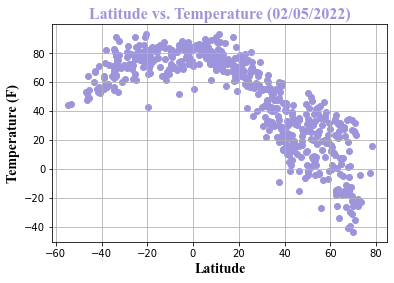

In [24]:
#plot my scatter plot using Latitude vs. Temperature
plt.scatter(df["Latitude"],df["Temperature (F)"],color="#9C95DC",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Temperature (F)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Temperature (02/05/2022)',fontsize = 16, fontweight = "bold",fontname="Times New Roman", color = "#9C95DC")
plt.grid(True)
#Save the plotted figures as .pngs
plt.savefig("FIG 1.Temperature (F) vs. Latitude.png")

In [25]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus temperature in all cities. Values shows that as latitude increases the temperature decreases.")

 The scatter plot above is comparing latitude versus temperature in all cities. Values shows that as latitude increases the temperature decreases.


## Latitude vs. Humidity Plot

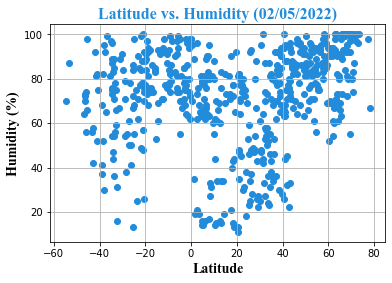

In [26]:
#plot my scatter plot using Latitude vs. Humidity
plt.scatter(df["Latitude"],df["Humidity %"],color="#228CDB",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Humidity (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Humidity (02/05/2022)',fontsize = 16, fontweight = "bold",fontname="Times New Roman", color = "#228CDB")
plt.grid(True)
#Save the plotted figures as .pngs
plt.savefig("FIG 2.Humidity (%) vs. Latitude.png")

In [27]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus temperature in all cities. We can see that all cities have some humidity and there does not seem to be a relationship.")

 The scatter plot above is comparing latitude versus temperature in all cities. We can see that all cities have some humidity and there does not seem to be a relationship.


## Latitude vs. Cloudiness Plot

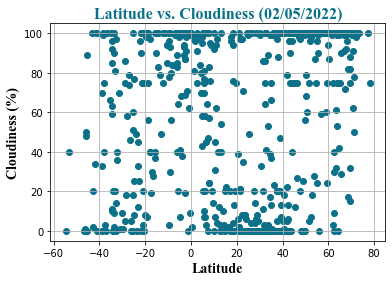

In [28]:
#plot my scatter plot using Latitude vs. Cloudiness
plt.scatter(df["Latitude"],df["Cloudiness"],color="#0B7189",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Cloudiness (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Cloudiness (02/05/2022)',fontsize = 16, fontweight = "bold",fontname="Times New Roman", color = "#0B7189")
plt.grid(True)
#Save the plotted figures as .pngs
plt.savefig("FIG 3.Cloudiness (%) vs. Latitude.png")

In [29]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus cloudiness in all cities. There does not seem to be a relationship between the two. ")

 The scatter plot above is comparing latitude versus cloudiness in all cities. There does not seem to be a relationship between the two. 


## Latitude vs. Wind Speed Plot

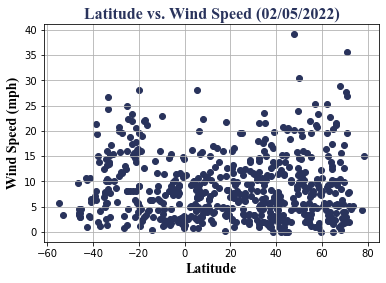

In [30]:
#plot my scatter plot using Latitude vs. Cloudiness
plt.scatter(df["Latitude"],df["Wind_Speed"],color="#29335C",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Wind Speed (mph)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Wind Speed (02/05/2022)',fontsize = 16, fontweight = "bold",fontname="Times New Roman", color = "#29335C")
plt.grid(True)
#Save the plotted figures as .pngs
plt.savefig("FIG 4.Wind Speed (mph) vs. Latitude.png")

In [31]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus wind speed in all cities. There does not seem to be a relationship between the two, but most cities are below 25 mph. ")

 The scatter plot above is comparing latitude versus wind speed in all cities. There does not seem to be a relationship between the two, but most cities are below 25 mph. 


## Linear Regression

In [32]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

In [33]:
#create northern and southern df for below plots
north_df = df.loc[(df['Latitude'] > 0)]
south_df =df.loc[(df['Latitude'] < 0)]

In [34]:
north_df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Norman Wells,75.0,CA,1.644134e+09,69.0,65.2820,-126.8329,-18.36,2.30,1002.0
6,Hamilton,7.0,US,1.644134e+09,90.0,39.1834,-84.5333,13.93,2.59,1029.0
7,Ukiah,0.0,US,1.644134e+09,85.0,39.1502,-123.2078,45.32,3.15,1025.0
8,Shenjiamen,99.0,CN,1.644134e+09,61.0,29.9576,122.2980,42.94,11.65,1029.0
11,Pedasí,0.0,PA,1.644134e+09,83.0,7.5333,-80.0333,73.06,15.84,1010.0
...,...,...,...,...,...,...,...,...,...,...
618,Sainte-Anne-des-Monts,25.0,CA,1.644135e+09,91.0,49.1240,-66.4924,-6.03,8.46,1031.0
619,Praia,20.0,CV,1.644135e+09,82.0,14.9215,-23.5087,66.74,13.80,1014.0
621,Hamīrpur,0.0,IN,1.644135e+09,34.0,25.9500,80.1500,70.77,6.35,1015.0
622,Verkhnevilyuysk,61.0,RU,1.644135e+09,100.0,63.4453,120.3167,-13.86,3.87,1022.0


In [35]:
south_df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
1,Ushuaia,0.0,AR,1.644134e+09,70.0,-54.8000,-68.3000,44.26,5.75,1012.0
2,Chui,90.0,UY,1.644134e+09,89.0,-33.6971,-53.4616,64.04,8.50,1008.0
3,Atuona,3.0,PF,1.644134e+09,77.0,-9.8000,-139.0333,78.98,22.88,1014.0
5,Busselton,100.0,AU,1.644134e+09,85.0,-33.6500,115.3333,64.74,24.32,1001.0
9,Cilegon,83.0,ID,1.644134e+09,76.0,-6.0174,106.0538,85.86,15.41,1007.0
...,...,...,...,...,...,...,...,...,...,...
595,Kendari,38.0,ID,1.644135e+09,70.0,-3.9450,122.4989,84.97,8.52,1006.0
599,Maragogi,93.0,BR,1.644135e+09,74.0,-9.0122,-35.2225,77.70,4.54,1011.0
616,Kalianget,100.0,ID,1.644135e+09,83.0,-7.0500,113.9333,81.14,14.56,1005.0
617,El Alto,68.0,PE,1.644135e+09,81.0,-4.2714,-81.2147,69.30,10.36,1011.0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7610712026488752


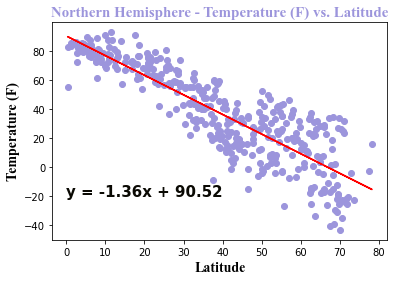

In [39]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#9C95DC")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Temperature (F)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude',fontsize = 15, fontweight = "bold",fontname="Times New Roman", color = "#9C95DC")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 5.Northern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3077340830813938


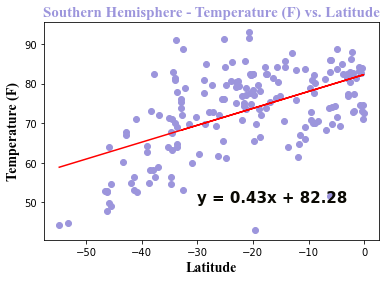

In [40]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#9C95DC")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Temperature (F)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude',fontsize = 15, fontweight = "bold",fontname="Times New Roman", color = "#9C95DC")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 6.Southern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()


In [41]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, the northern hemisphere has a negative correlation and the southern has a positive. In other words temperature is higher closer to 0 latitude (equator.) ")

 Comparing linear regression from both hemispheres, the northern hemisphere has a negative correlation and the southern has a positive. In other words temperature is higher closer to 0 latitude (equator.) 


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2430178057085754


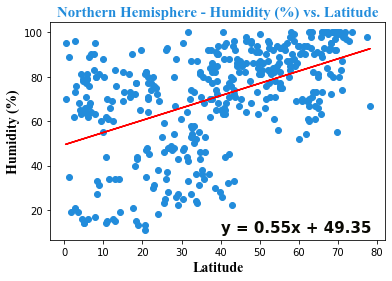

In [42]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#228CDB")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Humidity (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude',fontsize = 15, fontweight = "bold",fontname="Times New Roman", color = "#228CDB")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 7.Northern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09568796843320089


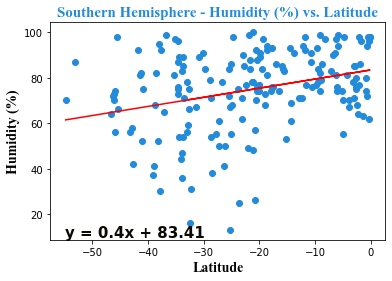

In [43]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#228CDB")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Humidity (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude',fontsize = 15, fontweight = "bold",fontname="Times New Roman", color = "#228CDB")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 8.Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()


In [ ]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, both hemisphere do not display a positive correlation for humidity. ")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1027193138937202


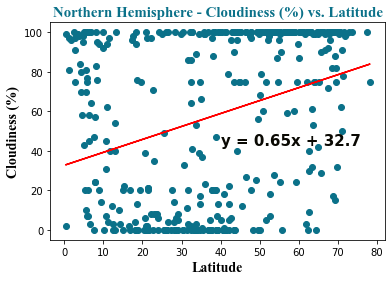

In [46]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#0B7189")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,43),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Cloudiness (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 15, fontweight = "bold",fontname="Times New Roman", color = "#0B7189")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 9.Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#0B7189")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Cloudiness (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 15, fontweight = "bold",fontname="Times New Roman", color = "#0B7189")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 10.Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()


In [ ]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for cloudiness. ")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#29335C")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Wind Speed (mph)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 16, fontweight = "bold",fontname="Times New Roman", color = "#29335C")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 11.Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#29335C")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,24),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Wind Speed (mph)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 16, fontweight = "bold",fontname="Times New Roman", color = "#29335C")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 12.Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()


In [ ]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for wind speed. ")

In [ ]:
#For Part I, you must include a written description of three observable trends based on the data.

print(f"Observation 1: One very obvious observation is the relationship between latitude and tempertures in both hemispheres. Temperature is higher closer to equator.")


print(f"Observation 2: Refering to the scatterplot Latitude vs. Wind Speed Plot, most cities are under 20pmh from random selected cities. We are not able to see a true correlation.")


print(f"Observation 3: Refering to the Latitude vs. Cloudiness Plot, we cannot make conclusions of correlation due to variability from random selected cities.")